In [1]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
DATA_DIR="/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended"
#robots = [4, 6]
seeds = [i for i in range(0, 30)]
print(seeds)
robots = [3,6,9,12,24,36,60,81,99,120]
rab_ranges = [4,8,12]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [3]:
def get_name(n_robot,seed,range):
    fname = DATA_DIR +'/'+'perf_divison_labour_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [4]:
def column_position(n_robot,seed,range):
    fname = DATA_DIR +'/'+'pos_divison_labour_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [5]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('collision_'+str(k))
        n.append('conflicts_'+str(k))
        n.append('belief_'+str(k))
        n.append('estimate_'+str(k))
        n.append('white_nei_agg_'+str(k))
        n.append('black_nei_agg_'+str(k))
        n.append('zone_collected_'+str(k))

    
    n.append('exp_finished')
    return n

In [6]:
def get_names_for_position(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
    
    n.append('exp_finished')
    return n

In [7]:
def get_names_for_position_white(n_r):
    n = []

    for k in range(0,n_r):
        if(k%3 == 0):
           
            n.append('x_'+str(k))
            n.append('y_'+str(k))
    return n
    
    

In [8]:
def get_names_for_position_black(n_r):
    n = []

    for k in range(0,n_r):
        if(k%3 == 1):
          
            n.append('x_'+str(k))
            n.append('y_'+str(k))

    return n 
    

In [9]:
def get_names_for_position_nesters(n_r):
    n = []

    for k in range(0,n_r):
        if(k%3 == 2):
            
            n.append('x_'+str(k))
            n.append('y_'+str(k))
    
    return n 


Total collision per robot in the whole experiment, time_taken and estimate average. 

In [ ]:
total_collision = pd.DataFrame()
total_time = pd.DataFrame()
total_conflicts = pd.DataFrame()

for robot in robots:
    for seed in seeds: 
        for range_ in rab_ranges:
            fname = get_name(robot,seed,range_)
            perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
            df = pd.DataFrame(data=perf_frame)
            collision_sum = pd.DataFrame() 
            conflicts_sum = pd.DataFrame()
            time_ = pd.DataFrame()
        
            collision = df.filter(regex='collision').tail(1).reset_index(drop=True)
            collision_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            collision_sum['collision_sum'] = collision.sum(axis='columns')/(robot*10)
            collision_sum['number_of_robots'] = robot
            collision_sum['seed'] = seed
            collision_sum['range'] = range_/10

            conflicts = df.filter(regex='conflicts').tail(1).reset_index(drop=True)
            conflicts_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            conflicts_sum['conflicts_sum'] = conflicts.sum(axis='columns')/(robot*10)
            conflicts_sum['number_of_robots'] = robot
            conflicts_sum['seed'] = seed
            conflicts_sum['range'] = range_/10

            time_= df['exp_finished'].tail(1).reset_index()
            time_.rename(columns={'index':'time'}, inplace=True)
            time_['time'] = time_['time']/10
            time_['number_of_robots'] = robot
            time_['seed'] = seed
            time_['range'] = range_/10


            total_collision = pd.concat([total_collision,collision_sum], ignore_index=True) 
            total_conflicts = pd.concat([total_conflicts,conflicts_sum], ignore_index=True)    
            total_time = pd.concat([total_time,time_], ignore_index=True) 



# print(perf_frame)

#total collisions for experiment 
# print(perf_frame[)
print(total_collision)
print(total_time)
print(total_conflicts)




In [ ]:
dx="number_of_robots"
dy="collision_sum"
dhue="range"
pal=["red","blue","green"]
data = total_collision

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Time spent avoiding collisions")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Collisions per robot (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("collision_time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
dx="number_of_robots"
dy="conflicts_sum"
dhue="range"
pal=["red","blue","green"]
data = total_conflicts

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("No of conflicts per robot")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.9},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Conflicts",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("conflicts.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
dx="number_of_robots"
dy="time"
dhue="range"
pal=["red","blue","green"]
data = total_time

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=12,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
t_conflicts = sns.load_dataset("total_conflicts").pivot("number_of_robots", "range", "conflicts_sum")
sns.heatmap(t_conflicts, cmap="crest")

Per State analysis for time and collisions

Visitation frequency in a grid fashion 


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_3_4_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_3_8_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_3_12_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_3_4_1.txt


KeyboardInterrupt: 

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

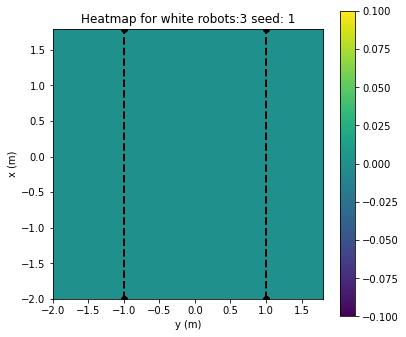

In [35]:

for robot in robots:
   for seed in seeds:
        for range_ in rab_ranges:

         black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']
         white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']


         fname = column_position(robot,seed,range_)
         pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

         df = pd.DataFrame(pos_frame)
         df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
         #df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
         state = df.filter(regex='state').melt()

         df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

         positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
         positionalDf = positionalDf.melt()
         positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
         positionalDf["state"] = state["value"]

         positionalDf_black = positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)
         positionalDf_white = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)

         x = list(positionalDf_white['position'].apply(lambda x: x[0]))
         y = list(positionalDf_white['position'].apply(lambda y: y[1]))

         f, ax = plt.subplots(figsize=(5.5,4.75))
         plt.rc('xtick', labelsize=10) 
         plt.rc('ytick', labelsize=10) 
         plt.title("Heatmap for white robots:" + str(robot) + " seed: "+str(seed))
         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
         extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
         plt.imshow(heatmap, origin='lower', extent=extent)
         plt.colorbar()
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         ax.set_ylabel("x (m)",fontsize=10)
         ax.set_xlabel("y (m)",fontsize=10)
         plt.tight_layout(pad=0.1)
         plt.xticks(np.arange(-2,2,0.2))
         plt.savefig("heatmap_white_comm_congestion"+str(range_)+"_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
         plt.clf()        

         x = list(positionalDf_black['position'].apply(lambda x: x[0]))
         y = list(positionalDf_black['position'].apply(lambda y: y[1]))

         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        
         f, ax = plt.subplots(figsize=(5.5,4.75))
         plt.rc('xtick', labelsize=10) 
         plt.rc('ytick', labelsize=10) 
         plt.title("Heatmap for black robots:" + str(robot) + " seed: "+str(seed))
         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
         extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
         plt.imshow(heatmap, origin='lower', extent=extent)
         plt.colorbar()
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         plt.tight_layout(pad=1)
         ax.set_ylabel("x (m)",fontsize=10)
         ax.set_xlabel("y (m)",fontsize=10)
         plt.tight_layout(pad=0.1)
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         plt.xticks(np.arange(-2,2,0.2))
         plt.savefig("heatmap_black_comm_congestion"+str(range_)+"_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
         plt.clf()





In [36]:
robots = [120]
rab_ranges = [8]

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_black = pd.DataFrame()
        positionalDf_white = pd.DataFrame()
        positionalDf_nesters = pd.DataFrame()

        for seed in seeds:
            
            fname = column_position(robot,seed,range_)
            
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            pos_frame_white = get_names_for_position_white(robot)
            pos_frame_black = get_names_for_position_black(robot)
            pos_frame_nesters = get_names_for_position_nesters(robot)
            
            df = pd.DataFrame(pos_frame)

            df_white = df[pos_frame_white]
            df_black = df[pos_frame_black]
            df_nesters = df[pos_frame_nesters]
            

            positionalDf_w = df_white.groupby(np.arange(len(df_white.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf_b = df_black.groupby(np.arange(len(df_black.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf_n = df_nesters.groupby(np.arange(len(df_nesters.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))            

            positionalDf_w = positionalDf_w.melt()
            positionalDf_w = positionalDf_w.rename(columns={"variable": "robot", "value": "position"})

            positionalDf_b = positionalDf_b.melt()
            positionalDf_b = positionalDf_b.rename(columns={"variable": "robot", "value": "position"})

            positionalDf_n = positionalDf_n.melt()
            positionalDf_n = positionalDf_n.rename(columns={"variable": "robot", "value": "position"})


            positionalDf_black = pd.concat([positionalDf_black,positionalDf_b], ignore_index=True) 
            positionalDf_white = pd.concat([positionalDf_white,positionalDf_w], ignore_index=True)
            positionalDf_nesters = pd.concat([positionalDf_nesters,positionalDf_n], ignore_index=True)
        

        x = list(positionalDf_white['position'].apply(lambda x: x[0]))
        y = list(positionalDf_white['position'].apply(lambda y: y[1]))

        f, ax = plt.subplots(figsize=(4.6,4))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10) 
        plt.title("No of robots: "+str(robot))
      
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
        if (robot==120):
            plt.colorbar(fraction=0.046, pad=0.04)
        plt.clim(0,0.8)
        plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        if (robot==12):
            ax.set_ylabel("White zone samplers\n x (m)",fontsize=10)
        else:
            ax.set_ylabel("x (m)",fontsize=10)
        ax.set_xlabel("y (m)",fontsize=10)
        plt.tight_layout(pad=0.2)
        plt.xticks(np.arange(-2,2.5,0.5))
        plt.yticks(np.arange(-2,2.5,0.5))
        plt.savefig("heatmap_white_hetero_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
        plt.clf()        

        x = list(positionalDf_black['position'].apply(lambda x: x[0]))
        y = list(positionalDf_black['position'].apply(lambda y: y[1]))

        f, ax = plt.subplots(figsize=(4.6,4))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10) 
        plt.title("No of robots: "+str(robot))
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
        
        if (robot==120):
            plt.colorbar(fraction=0.046, pad=0.04)
        plt.clim(0,0.8)
        plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        #plt.tight_layout(pad=1)
        if (robot==12):
            ax.set_ylabel("Black zone samplers\n x (m)",fontsize=10)
        else:
            ax.set_ylabel("x (m)",fontsize=10)
        ax.set_xlabel("y (m)",fontsize=10)
        plt.tight_layout(pad=0.2)
        plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        plt.xticks(np.arange(-2,2.5,0.5))
        plt.yticks(np.arange(-2,2.5,0.5))
        plt.savefig("heatmap_black_hetero_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
        plt.clf()

        x = list(positionalDf_nesters['position'].apply(lambda x: x[0]))
        y = list(positionalDf_nesters['position'].apply(lambda y: y[1]))

        f, ax = plt.subplots(figsize=(4.6,4))
        plt.rc('xtick', labelsize=10) 
        plt.rc('ytick', labelsize=10) 
        plt.title("No of robots: "+str(robot))
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
        if (robot==120):
            plt.colorbar(fraction=0.046, pad=0.04)
        plt.clim(0,0.8)
        plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        
        if (robot==12):
            ax.set_ylabel("Nest zone communicators\n x (m)",fontsize=10)
        else:
            ax.set_ylabel("x (m)",fontsize=10)
        ax.set_xlabel("y (m)",fontsize=10)
        plt.tight_layout(pad=0.2)
        plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
        plt.xticks(np.arange(-2,2.5,0.5))
        plt.yticks(np.arange(-2,2.5,0.5))
        plt.savefig("heatmap_nest_hetero_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
        plt.clf()
            






/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_120_8_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_120_8_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_120_8_2.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_120_8_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_120_8_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_120_8_5.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended/pos_divison_labour_120_8_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/div_labour_extended

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

<Figure size 331.2x288 with 0 Axes>

In [ ]:
x = list(positionalDf_black['position'].apply(lambda x: x[0]))
y = list(positionalDf_black['position'].apply(lambda y: y[1]))

# print(positionalDf_black['position'])
# print(x)
# print(y)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
print(extent)
plt.imshow(heatmap, origin='lower', extent=extent)

#plt.clim(0,30000) 
plt.colorbar()
plt.savefig("heatmap_black.pdf", dpi=600, format="pdf", transparent=False)
# plt.show()